In [188]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from bubbly.bubbly import bubbleplot 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
import plotly.io as pio
init_notebook_mode(connected=True)
import os
from PIL import Image

PATH = "C:/Users/envym/workplace/datathon"
print(os.listdir(PATH))

['ahlets_age_distribution.png', 'athlete_events.csv', 'athlets_height_distribution_polt.png', 'athlets_height_weight_mean(group).png', 'athlets_per_olympic_game(bar).png', 'athlets_per_olympic_game(box).png', 'athlets_per_olympic_game(scat).png', 'athlets_per_olympic_game2(bar).png', 'athlets_per_olympic_game2(scat).png', 'athlets_weight_distribution.png', 'countries(bronze).png', 'countries(gold).png', 'countries(silver).png', 'datathon.ipynb', 'datathon1.ipynb', 'medal_per_olympic.png', 'medal_per_sport.png', 'noc_regions.csv', 'number_athlets_per_sport_summer(circle).png', 'number_athlets_per_sport_winter(circle).png', 'olympic_countires.png', 'result', 'sports_per_olympic_edition(bar).png']


In [189]:
# 파일 저장
athlete_events_df = pd.read_csv(PATH+"/athlete_events.csv")
noc_regions_df = pd.read_csv(PATH+"/noc_regions.csv")

In [190]:
# data 형태 
print("Athletes and Events data -  rows:",athlete_events_df.shape[0]," columns:", athlete_events_df.shape[1])
print("NOC Regions data -  rows:",noc_regions_df.shape[0]," columns:", noc_regions_df.shape[1])

Athletes and Events data -  rows: 271116  columns: 15
NOC Regions data -  rows: 230  columns: 3


In [191]:
athlete_events_df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [192]:
noc_regions_df.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [193]:
# Athlete 누락 데이터 확인
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(athlete_events_df)

,Total,Percent
Medal,231333,85.326207
Weight,62875,23.191180
Height,60171,22.193821
Age,9474,3.494445
ID,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Team,0,0.000000
NOC,0,0.000000
Games,0,0.000000


In [194]:
# NOC의 누락 데이터를 살펴보자
missing_data(noc_regions_df)

,Total,Percent
notes,209,90.869565
region,3,1.304348
NOC,0,0.000000


In [195]:
#개최연도 도시 동계 하계를 구분해보자
tmp = athlete_events_df.groupby(['Year', 'City'])['Season'].value_counts()
df = pd.DataFrame(data={'Athlets': tmp.values}, index=tmp.index).reset_index()

In [196]:
# 샘플 다섯개 보기
df.head(5)

,Year,City,Season,Athlets
0,1896,Athina,Summer,380
1,1900,Paris,Summer,1936
2,1904,St. Louis,Summer,1301
3,1906,Athina,Summer,1733
4,1908,London,Summer,3101


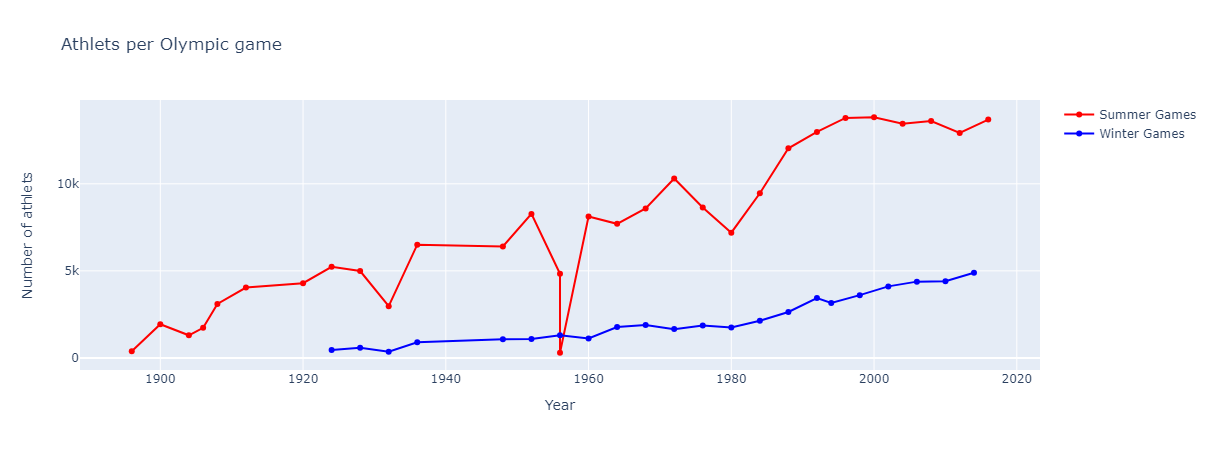

In [197]:
# 연도별 동계하계 올림픽 선수 수
dfS = df[df['Season']=='Summer']; dfW = df[df['Season']=='Winter']

traceS = go.Scatter(
    x = dfS['Year'],y = dfS['Athlets'],
    name="Summer Games",
    marker=dict(color="Red"),
    mode = "markers+lines"
)
traceW = go.Scatter(
    x = dfW['Year'],y = dfW['Athlets'],
    name="Winter Games",
    marker=dict(color="Blue"),
    mode = "markers+lines"
)

data = [traceS, traceW]
layout = dict(title = 'Athlets per Olympic game',
          xaxis = dict(title = 'Year', showticklabels=True), 
          yaxis = dict(title = 'Number of athlets'),
          hovermode = 'closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-athlets2')

img = Image.open('athlets_per_olympic_game(scat).png')
display(img)


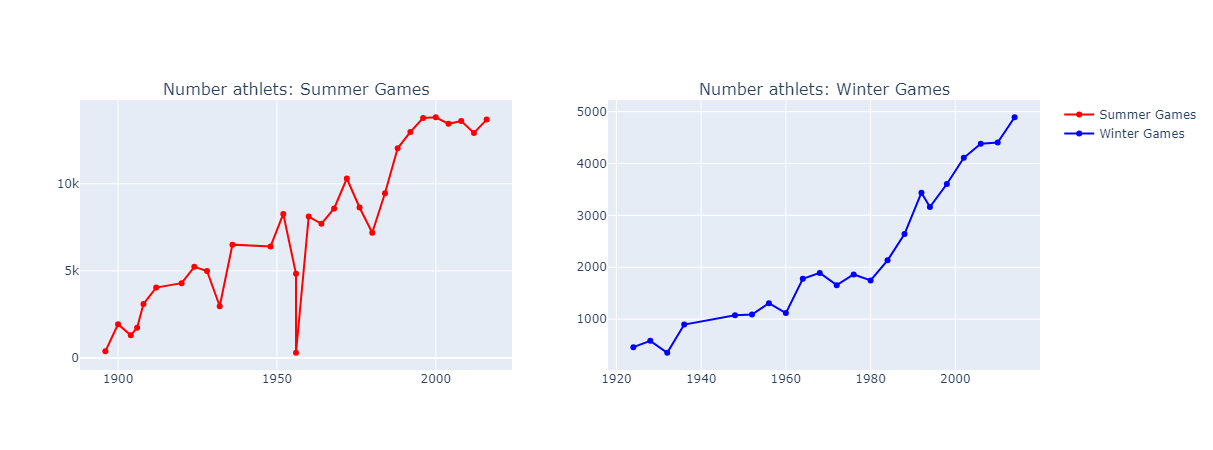

In [198]:
traceS = go.Scatter(
    x = dfS['Year'],y = dfS['Athlets'],
    name="Summer Games",
    marker=dict(color="Red"),
    mode = "markers+lines",
    text=dfS['City'],
)
traceW = go.Scatter(
    x = dfW['Year'],y = dfW['Athlets'],
    name="Winter Games",
    marker=dict(color="Blue"),
    mode = "markers+lines",
    text=dfW['City']
)

data = [traceS, traceW]

fig = make_subplots(rows=1, cols=2, subplot_titles=('Number athlets: Summer Games', 'Number athlets: Winter Games'))
fig.append_trace(traceS, 1, 1)
fig.append_trace(traceW, 1, 2)

iplot(fig, filename='events-athlets2')

img = Image.open('athlets_per_olympic_game2(scat).png')
display(img)


In [199]:
#막대 그래프 만들기, 도시 추가
tmp = athlete_events_df.groupby('Year')['City'].value_counts()
df2 = pd.DataFrame(data={'Athlets': tmp.values}, index=tmp.index).reset_index()
df2 = df2.merge(df)

In [200]:
iplot(ff.create_table(df2.head(3)), filename='jupyter-table2')

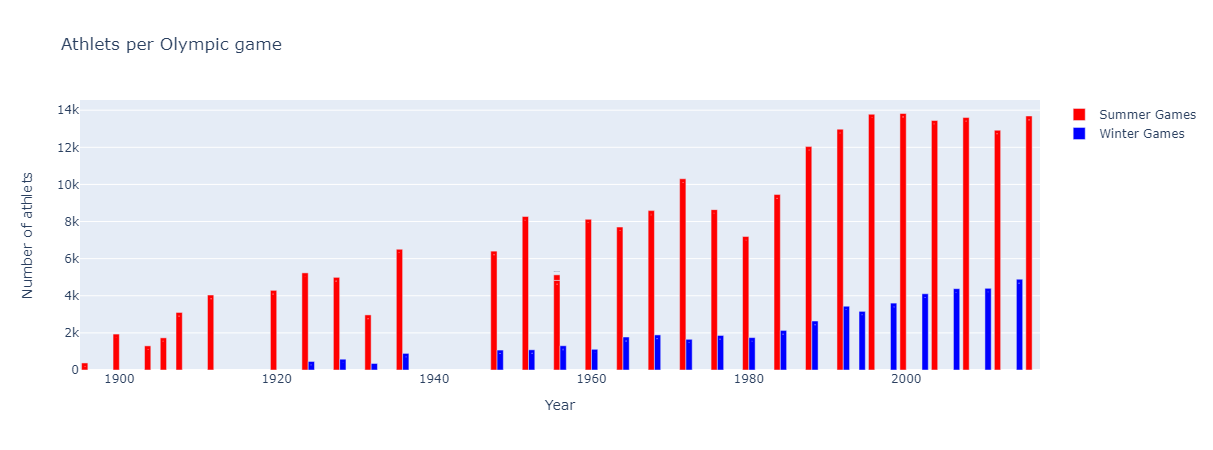

In [201]:
# 막대그래프 생성 커서를 가져다대면 도시 표시
dfS = df2[df2['Season']=='Summer']; dfW = df2[df2['Season']=='Winter']

traceS = go.Bar(
    x = dfS['Year'],y = dfS['Athlets'],
    name="Summer Games",
    marker=dict(color="Red"),
    text=dfS['City']
)
traceW = go.Bar(
    x = dfW['Year'],y = dfW['Athlets'],
    name="Winter Games",
    marker=dict(color="Blue"),
    text=dfS['City']
)

data = [traceS, traceW]
layout = dict(title = 'Athlets per Olympic game',
          xaxis = dict(title = 'Year', showticklabels=True), 
          yaxis = dict(title = 'Number of athlets'),
          hovermode = 'closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-athlets3')

img = Image.open('athlets_per_olympic_game(bar).png')
display(img)

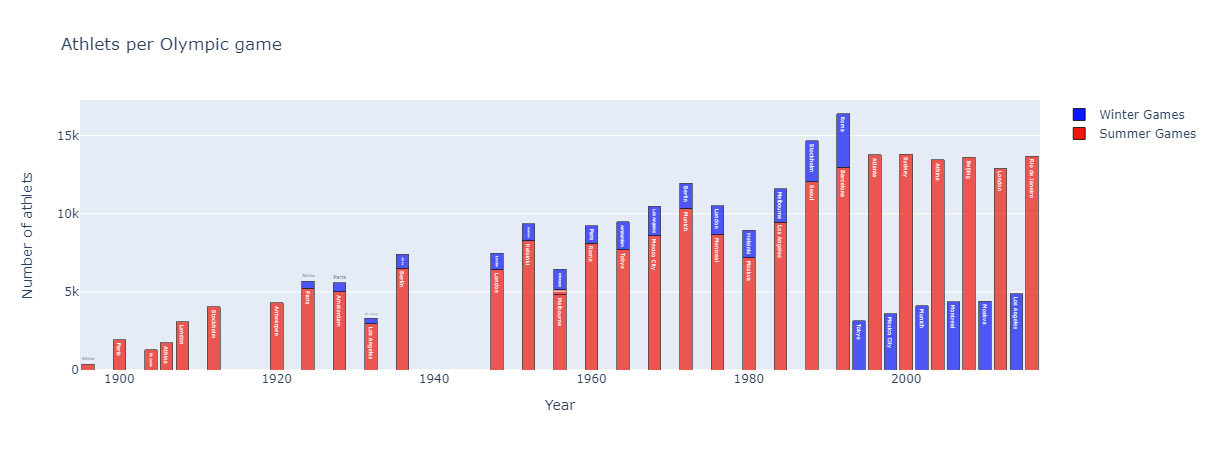

In [202]:
#막대 그래프 변형
traceS = go.Bar(
    x = dfS['Year'],y = dfS['Athlets'],
    name="Summer Games",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='black',
                    width=0.75),
                opacity=0.7,
            ),
    text=dfS['City'],
    
)
traceW = go.Bar(
    x = dfW['Year'],y = dfW['Athlets'],
    name="Winter Games",
    marker=dict(
                color='rgb(11,23,245)',
                line=dict(
                    color='black',
                    width=0.75),
                opacity=0.7,
            ),
    text=dfS['City']
)

data = [traceS, traceW]
layout = dict(title = 'Athlets per Olympic game',
          xaxis = dict(title = 'Year', showticklabels=True), 
          yaxis = dict(title = 'Number of athlets'),
          hovermode = 'closest',
          barmode='stack'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-athlets4')

img = Image.open('athlets_per_olympic_game2(bar).png')
display(img)

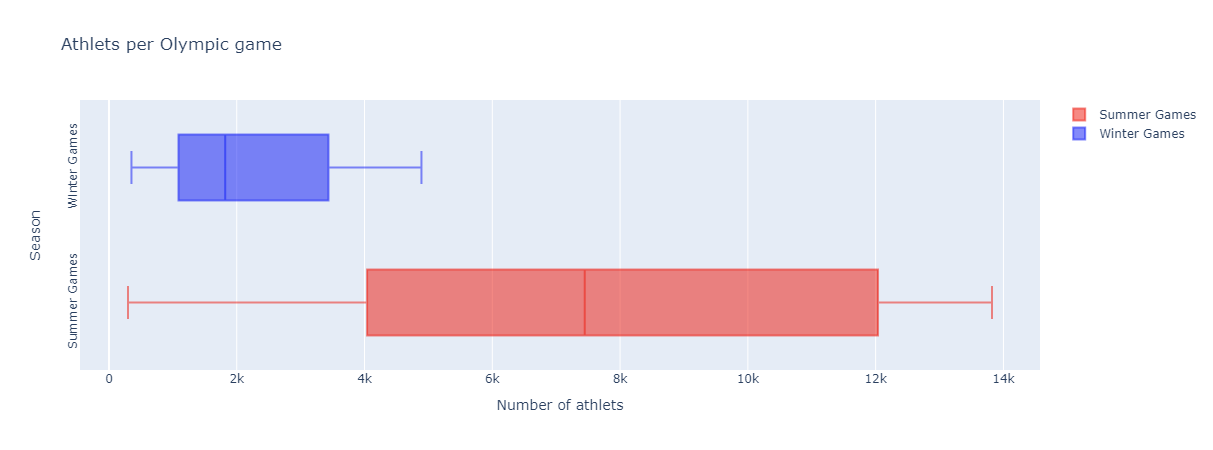

In [203]:
#박스 그래프
traceS = go.Box(
    x = dfS['Athlets'],
    name="Summer Games",
    
     marker=dict(
                color='rgba(238,23,11,0.5)',
                line=dict(
                    color='red',
                    width=1.2),
            ),
    text=dfS['City'],
    orientation='h',
    
)
traceW = go.Box(
    x = dfW['Athlets'],
    name="Winter Games",
    marker=dict(
                color='rgba(11,23,245,0.5)',
                line=dict(
                    color='blue',
                    width=1.2),
            ),
    text=dfS['City'],  orientation='h',
)

data = [traceS, traceW]
layout = dict(title = 'Athlets per Olympic game',
          xaxis = dict(title = 'Number of athlets',showticklabels=True),
          yaxis = dict(title = 'Season', showticklabels=True, tickangle=-90), 
          hovermode = 'closest',
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-athlets5')

img = Image.open('athlets_per_olympic_game(box).png')
display(img)

In [204]:
#종목을 살펴보자
tmp = athlete_events_df.groupby(['Year', 'City','Season'])['Sport'].nunique()
df = pd.DataFrame(data={'Sports': tmp.values}, index=tmp.index).reset_index()

In [205]:
# 샘플
df.head(3)

,Year,City,Season,Sports
0,1896,Athina,Summer,9
1,1900,Paris,Summer,20
2,1904,St. Louis,Summer,18


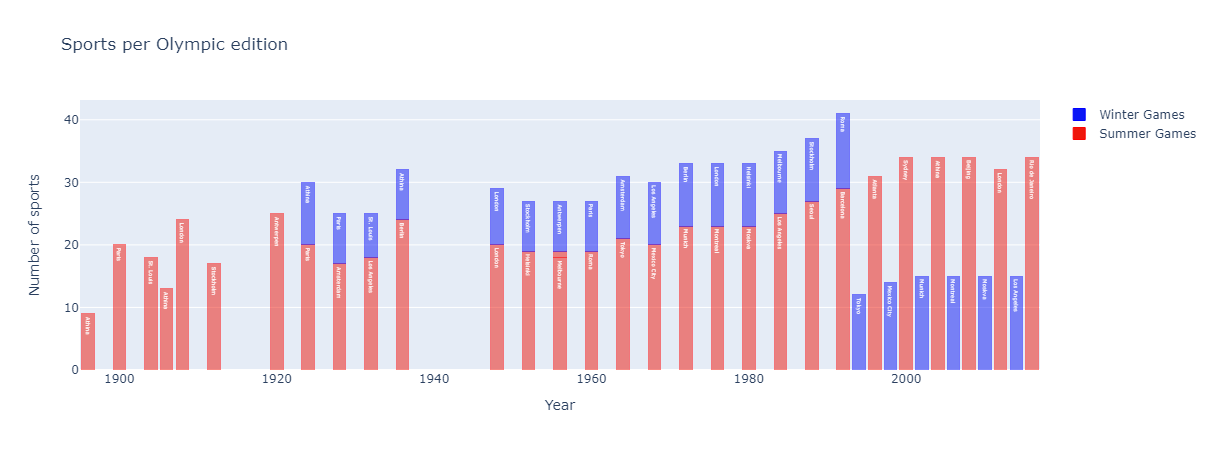

In [206]:
# 동계하계올림픽 종목 수
dfS = df[df['Season']=='Summer']; dfW = df[df['Season']=='Winter']

traceS = go.Bar(
    x = dfS['Year'],y = dfS['Sports'],
    name="Summer Games",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= dfS['City'],
)
traceW = go.Bar(
    x = dfW['Year'],y = dfW['Sports'],
    name="Winter Games",
    marker=dict(
                color='rgb(11,23,245)',
                line=dict(
                    color='blue',
                    width=1),
                opacity=0.5,
            ),
    text=dfS['City']
)

data = [traceS, traceW]
layout = dict(title = 'Sports per Olympic edition',
          xaxis = dict(title = 'Year', showticklabels=True), 
          yaxis = dict(title = 'Number of sports'),
          hovermode = 'closest',
          barmode='stack'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-sports1')

img = Image.open('sports_per_olympic_edition(bar).png')
display(img)

In [207]:
tmp = athlete_events_df.groupby(['Season'])['Sport'].value_counts()
df = pd.DataFrame(data={'Athlets': tmp.values}, index=tmp.index).reset_index()
df.head(3)

,Season,Sport,Athlets
0,Summer,Athletics,38624
1,Summer,Gymnastics,26707
2,Summer,Swimming,23195


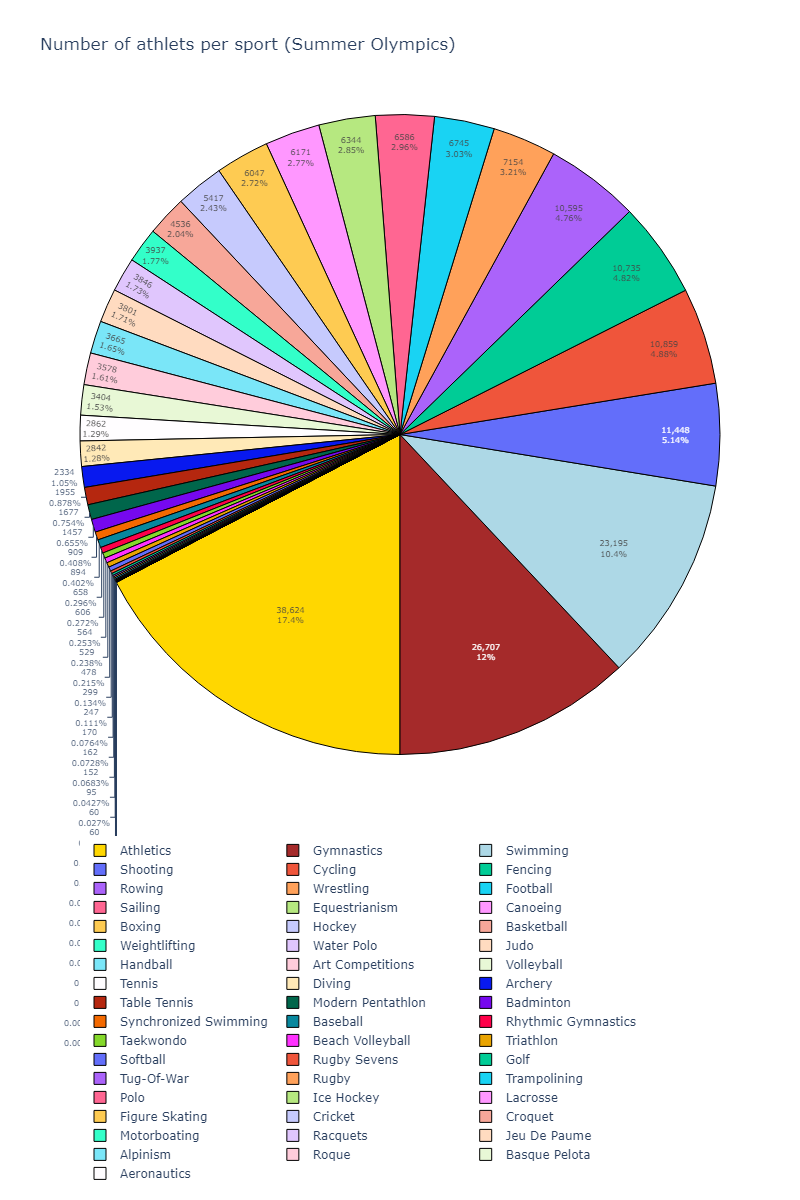

In [208]:
# 원형 그래프
labels = ['Sunny side of pyramid','Shaddy side of pyramid','Sky']
values = [300,150,1200]
colors = ['gold', 'brown', 'lightblue']


df_S = df[df['Season']=='Summer']

trace = go.Pie(labels=df_S['Sport'], 
               values=df_S['Athlets'],
               hoverinfo='label+value+percent', 
               textinfo='value+percent', 
               textfont=dict(size=8),
               rotation=180,
               marker=dict(colors=colors, 

                           line=dict(color='#000000', width=1)
                        )
            )

data = [trace]
layout = dict(title = "Number of athlets per sport (Summer Olympics)",
                  width=800,
                  height=1200,
              legend=dict(orientation="h")
             )
fig = dict(data=data,layout=layout)
iplot(fig, filename='styled_pie_chart')

img = Image.open('number_athlets_per_sport_summer(circle).png')
display(img)

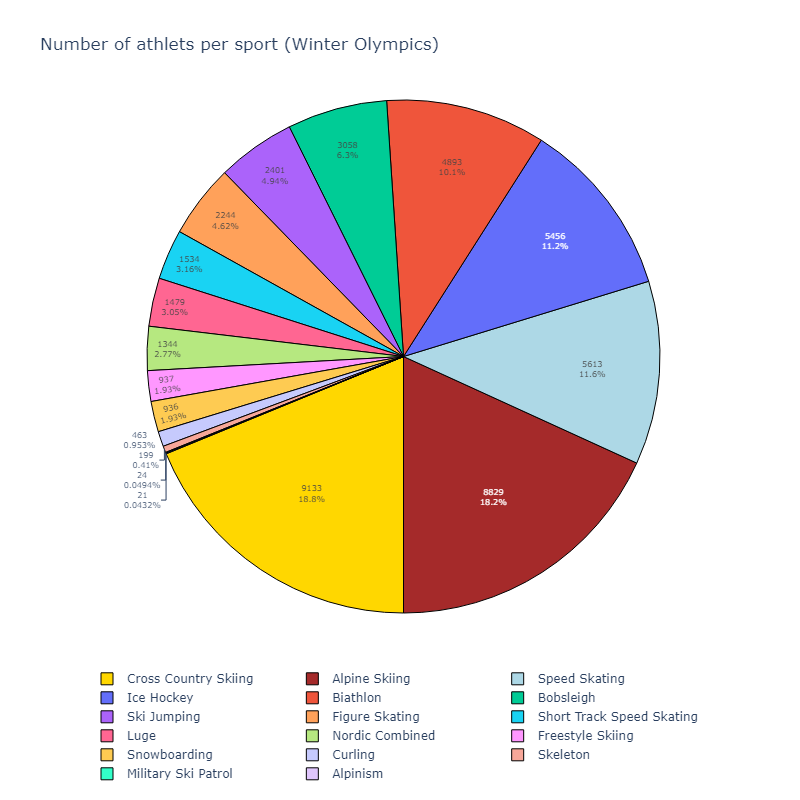

In [209]:
#하계 올림픽 원형
df_S = df[df['Season']=='Winter']

trace = go.Pie(labels=df_S['Sport'], 
               values=df_S['Athlets'],
               hoverinfo='label+value+percent', 
               textinfo='value+percent', 
               textfont=dict(size=8),
               rotation=180,
               marker=dict(colors=colors, 

                           line=dict(color='#000000', width=1)
                        )
            )

data = [trace]
layout = dict(title = "Number of athlets per sport (Winter Olympics)",
                  width=800,
                  height=800,
              legend=dict(orientation="h")
             )
fig = dict(data=data,layout=layout)
iplot(fig, filename='styled_pie_chart')

img = Image.open('number_athlets_per_sport_winter(circle).png')
display(img)

In [210]:
# noc_regions와 athlete_events를 병합
olympics_df = athlete_events_df.merge(noc_regions_df)
print("All Olympics data -  rows:",olympics_df.shape[0]," columns:", olympics_df.shape[1])

All Olympics data -  rows: 270767  columns: 17


In [211]:
olympics_df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN


In [212]:
# columns을 국가로 교체, 몇번 참가했는지
olympics_df=olympics_df.rename(columns = {'region':'Country'})

tmp = olympics_df.groupby(['Country'])['Year'].nunique()
df = pd.DataFrame(data={'Editions': tmp.values}, index=tmp.index).reset_index()
df.head(5)

,Country,Editions
0,Afghanistan,14
1,Albania,11
2,Algeria,15
3,American Samoa,9
4,Andorra,17


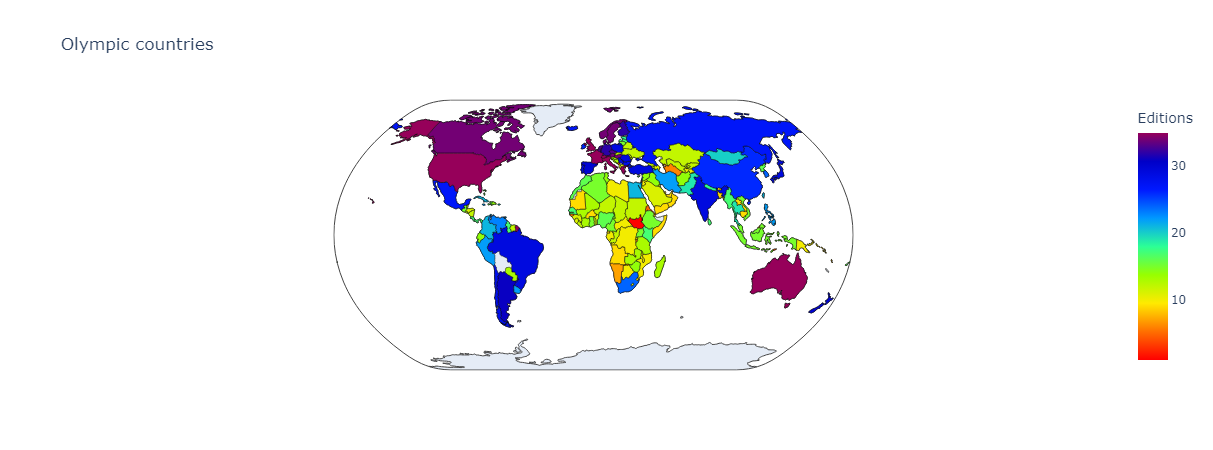

In [213]:
#동계하계올림픽 총합 참가 횟수
trace = go.Choropleth(
            locations = df['Country'],
            locationmode='country names',
            z = df['Editions'],
            text = df['Country'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'rainbow',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Editions',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Olympic countries',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

img = Image.open('olympic_countires.png')
display(img)

In [214]:
# 국가별 연도별 올림픽 참가자 수
tmp = olympics_df.groupby(['Year','Sport'])['Country'].value_counts()
dataset = pd.DataFrame(data={'Athlets': tmp.values}, index=tmp.index).reset_index()
dataset.head(5)

,Year,Sport,Country,Athlets
0,1896,Athletics,Greece,36
1,1896,Athletics,USA,21
2,1896,Athletics,Germany,14
3,1896,Athletics,France,12
4,1896,Athletics,UK,7


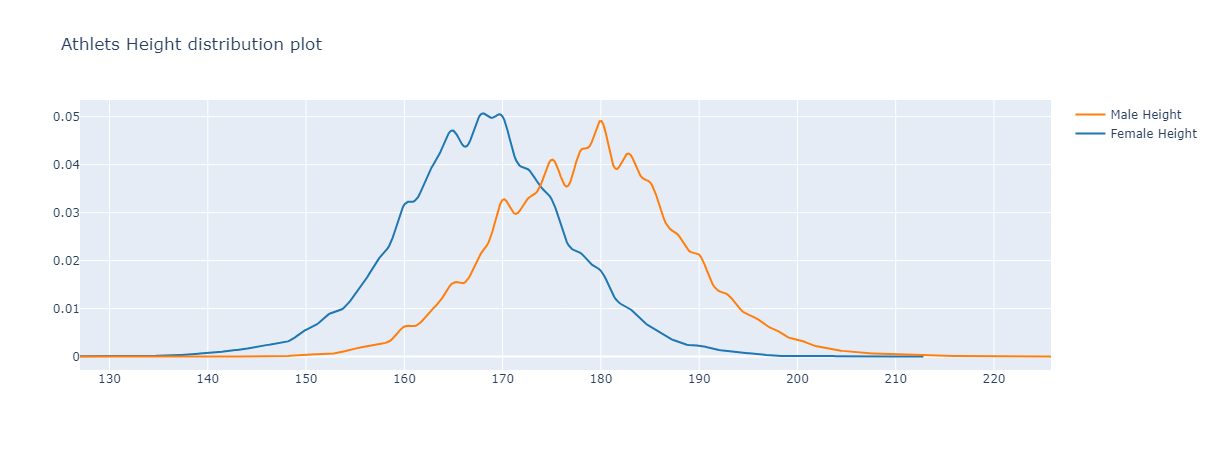

In [215]:
# 성별에따른 운동 선수 키 분포
female_h = olympics_df[olympics_df['Sex']=='F']['Height'].dropna()
male_h = olympics_df[olympics_df['Sex']=='M']['Height'].dropna()

hist_data = [female_h, male_h]
group_labels = ['Female Height', 'Male Height']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Athlets Height distribution plot')
iplot(fig, filename='dist_only')

img = Image.open('athlets_height_distribution_polt.png')
display(img)



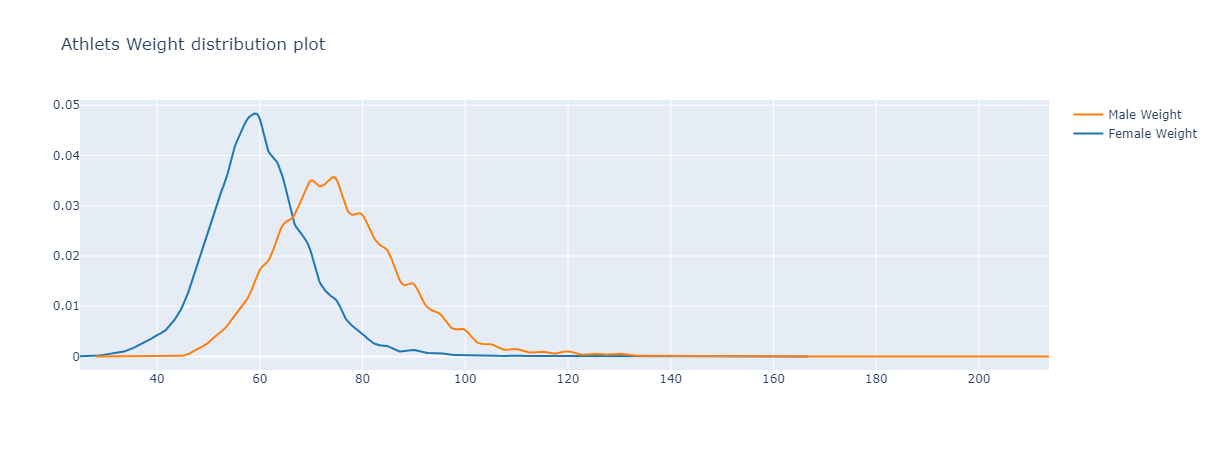

In [216]:
# 남녀성별 몸무게
female_w = olympics_df[olympics_df['Sex']=='F']['Weight'].dropna()
male_w = olympics_df[olympics_df['Sex']=='M']['Weight'].dropna()

hist_data = [female_w, male_w]
group_labels = ['Female Weight', 'Male Weight']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Athlets Weight distribution plot')
iplot(fig, filename='dist_only')

img = Image.open('athlets_weight_distribution.png')
display(img)

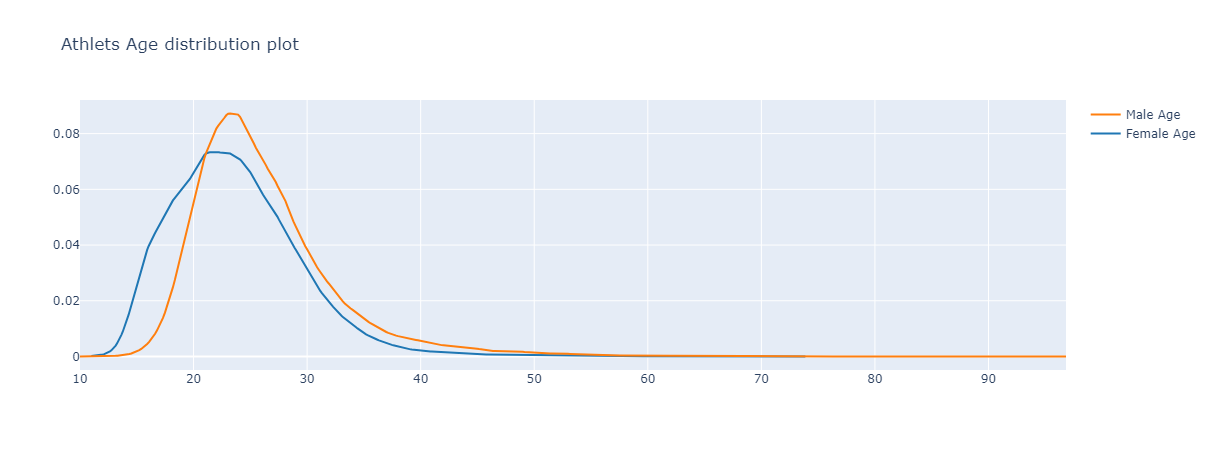

In [217]:
# 나이 분포
female_a = olympics_df[olympics_df['Sex']=='F']['Age'].dropna()
male_a = olympics_df[olympics_df['Sex']=='M']['Age'].dropna()

hist_data = [female_a, male_a]
group_labels = ['Female Age', 'Male Age']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Athlets Age distribution plot')
iplot(fig, filename='dist_only')

img = Image.open('ahlets_age_distribution.png')
display(img)

In [218]:
# x축에 평균키 y축에 평균체중 종목별로 묶어서 표시

tmp = olympics_df.groupby(['Sport'])[['Height', 'Weight']].agg('mean').dropna()
df1 = pd.DataFrame(tmp).reset_index()
tmp2 = olympics_df.groupby(['Sport'])['ID'].count()
df2 = pd.DataFrame(tmp2).reset_index()
dataset = df1.merge(df2)

In [219]:
hover_text = []
for index, row in dataset.iterrows():
    hover_text.append(('Sport: {}<br>'+
                      'Number of athlets: {}<br>'+
                      'Mean Height: {}<br>'+
                      'Mean Weight: {}<br>').format(row['Sport'],
                                            row['ID'],
                                            round(row['Height'],2),
                                            round(row['Weight'],2)))
dataset['hover_text'] = hover_text

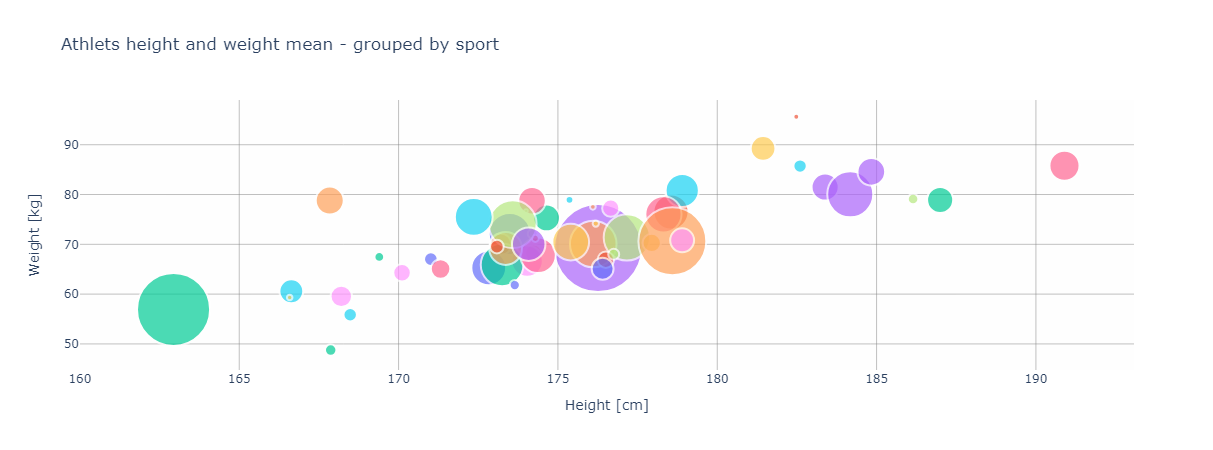

In [220]:
# 버블 그래프 그리기
data = []
for sport in dataset['Sport']:
    ds = dataset[dataset['Sport']==sport]
    trace = go.Scatter(
        x = ds['Height'],
        y = ds['Weight'],
        name = sport,
        marker=dict(
            symbol='circle',
            sizemode='area',
            sizeref=10,
            size=ds['ID'],
            line=dict(
                width=2
            ),),
        text = ds['hover_text']
    )
    data.append(trace)
                         
layout = go.Layout(
    title='Athlets height and weight mean - grouped by sport',
    xaxis=dict(
        title='Height [cm]',
        gridcolor='rgb(128, 128, 128)',
        zerolinewidth=1,
        ticklen=1,
        gridwidth=0.5,
    ),
    yaxis=dict(
        title='Weight [kg]',
        gridcolor='rgb(128, 128, 128)',
        zerolinewidth=1,
        ticklen=1,
        gridwidth=0.5,
    ),
    paper_bgcolor='rgb(255,255,255)',
    plot_bgcolor='rgb(254, 254, 254)',
    showlegend=False,
)


fig = dict(data = data, layout = layout)

iplot(fig, filename='athlets_body_measures')

img = Image.open('athlets_height_weight_mean(group).png')
display(img)

In [221]:
# 메달을 확인해보자

tmp = olympics_df.groupby(['Country', 'Medal'])['ID'].agg('count').dropna()
df = pd.DataFrame(tmp).reset_index()

In [222]:
dfG = df[df['Medal']=='Gold']
dfS = df[df['Medal']=='Silver']
dfB = df[df['Medal']=='Bronze']

def draw_map(dataset, title, colorscale):
    trace = go.Choropleth(
                locations = dataset['Country'],
                locationmode='country names',
                z = dataset['ID'],
                text = dataset['Country'],
                autocolorscale =False,
                reversescale = True,
                colorscale = colorscale,
                marker = dict(
                    line = dict(
                        color = 'rgb(0,0,0)',
                        width = 0.5)
                ),
                colorbar = dict(
                    title = 'Medals',
                    tickprefix = '')
            )
    data = [trace]
    layout = go.Layout(
        title = title,
        geo = dict(
            showframe = True,
            showlakes = False,
            showcoastlines = True,
            projection = dict(
                type = 'natural earth'
            )
        )
    )
    fig = dict( data=data, layout=layout )
    iplot(fig)

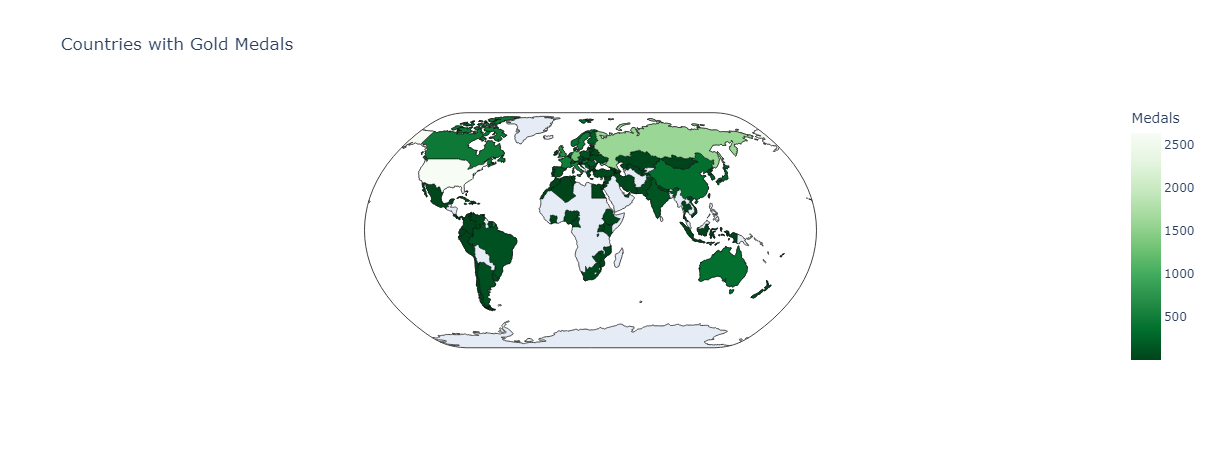

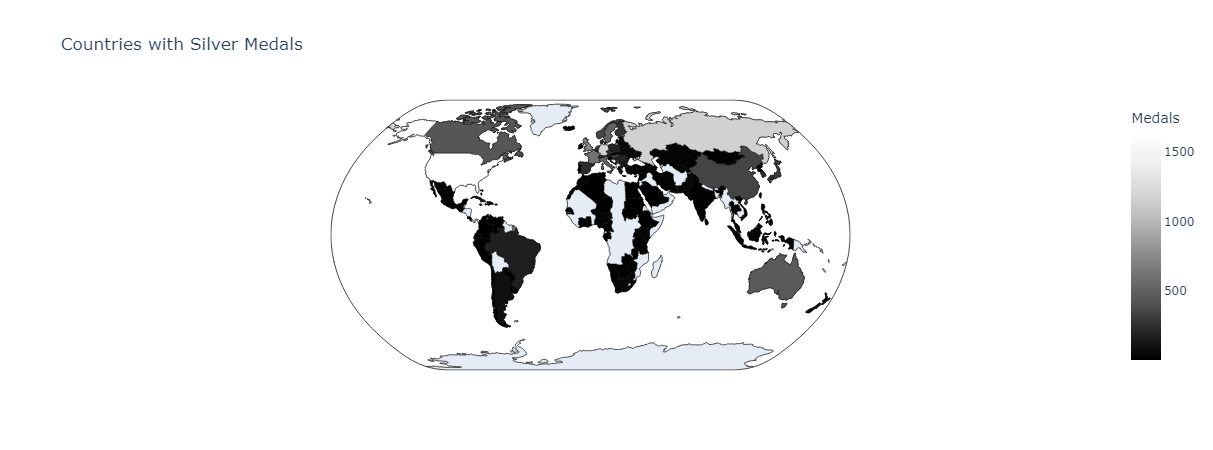

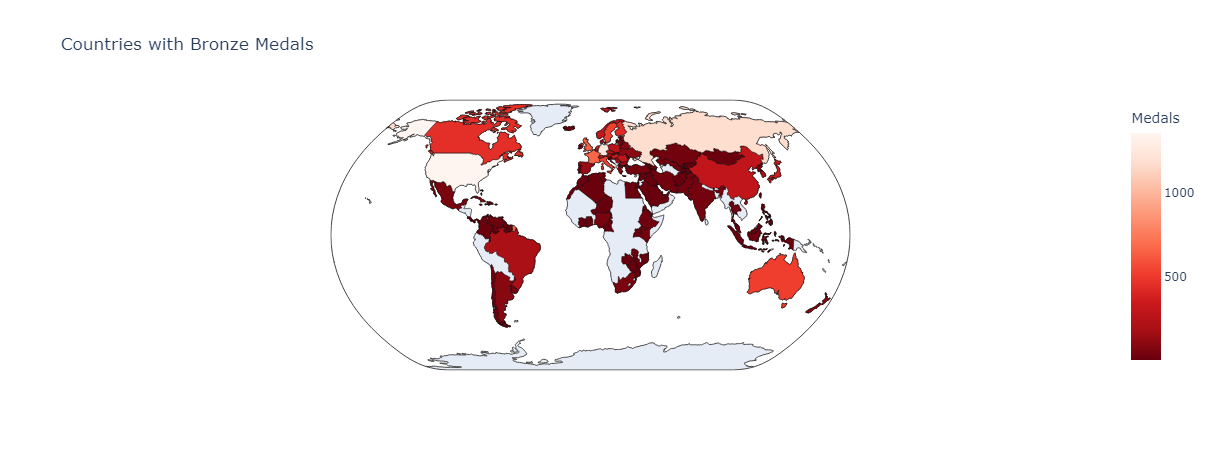

In [223]:
# 금은동 획득 국가 그리기

draw_map(dfG, "Countries with Gold Medals",'Greens')

draw_map(dfS, "Countries with Silver Medals",'Greys')

draw_map(dfB, "Countries with Bronze Medals",'Reds')

img = Image.open('countries(gold).png')
display(img)

img = Image.open('countries(silver).png')
display(img)

img = Image.open('countries(bronze).png')
display(img)

In [224]:
# 올림픽 회차마다 메달 수

tmp = olympics_df.groupby(['Year', 'City','Season', 'Medal'])['ID'].agg('count').dropna()
df = pd.DataFrame(tmp).reset_index()
dfG = df[df['Medal']=='Gold']
dfS = df[df['Medal']=='Silver']
dfB = df[df['Medal']=='Bronze']

dfG.head()

,Year,City,Season,Medal,ID
1,1896,Athina,Summer,Gold,62
4,1900,Paris,Summer,Gold,201
7,1904,St. Louis,Summer,Gold,173
10,1906,Athina,Summer,Gold,157
13,1908,London,Summer,Gold,294


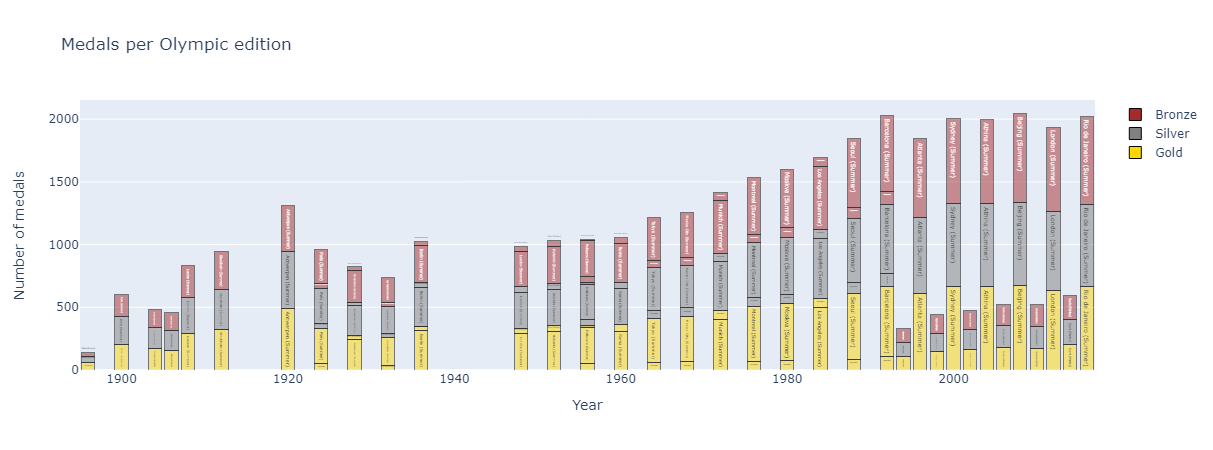

In [225]:
traceG = go.Bar(
    x = dfG['Year'],y = dfG['ID'],
    name="Gold",
     marker=dict(
                color='gold',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text = dfG['City']+ " (" + dfG['Season'] + ")",
)
traceS = go.Bar(
    x = dfS['Year'],y = dfS['ID'],
    name="Silver",
    marker=dict(
                color='Grey',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfS['City']+ " (" + dfS['Season'] + ")",
)

traceB = go.Bar(
    x = dfB['Year'],y = dfB['ID'],
    name="Bronze",
    marker=dict(
                color='Brown',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfB['City']+ " (" + dfB['Season'] + ")",
)

data = [traceG, traceS, traceB]
layout = dict(title = 'Medals per Olympic edition',
          xaxis = dict(title = 'Year', showticklabels=True), 
          yaxis = dict(title = 'Number of medals'),
          hovermode = 'closest',
          barmode='stack'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-sports1')

img = Image.open('medal_per_olympic.png')
display(img)

In [226]:
# 종목별 메달 개수

tmp = olympics_df.groupby(['Sport', 'Medal'])['ID'].agg('count').dropna()
df = pd.DataFrame(tmp).reset_index()
dfG = df[df['Medal']=='Gold']
dfS = df[df['Medal']=='Silver']
dfB = df[df['Medal']=='Bronze']

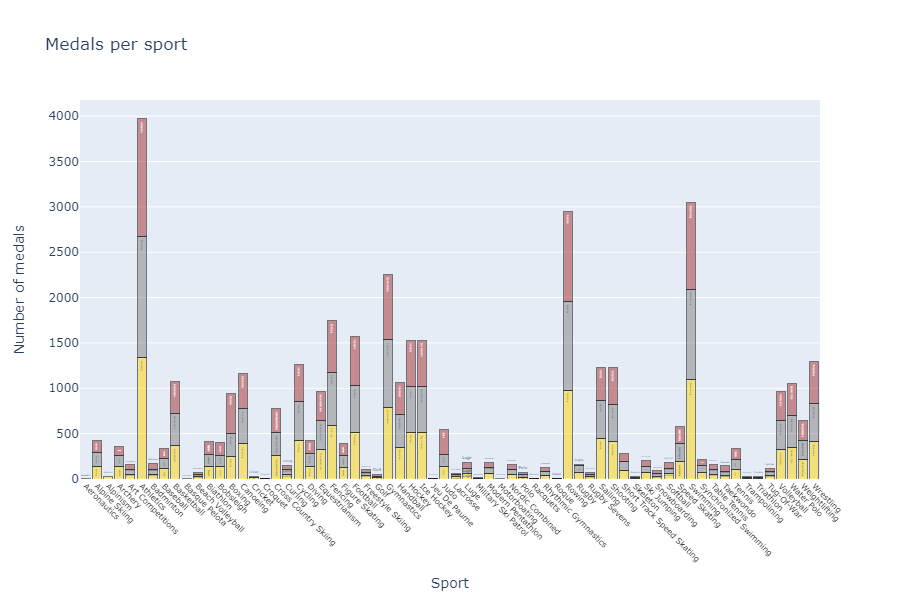

In [227]:
traceG = go.Bar(
    x = dfG['Sport'],y = dfG['ID'],
    name="Gold",
     marker=dict(
                color='gold',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text = dfG['Sport'],
    #orientation = 'h'
)
traceS = go.Bar(
    x = dfS['Sport'],y = dfS['ID'],
    name="Silver",
    marker=dict(
                color='Grey',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfS['Sport'],
    #orientation = 'h'
)

traceB = go.Bar(
    x = dfB['Sport'],y = dfB['ID'],
    name="Bronze",
    marker=dict(
                color='Brown',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfB['Sport'],
   # orientation = 'h'
)

data = [traceG, traceS, traceB]
layout = dict(title = 'Medals per sport',
          xaxis = dict(title = 'Sport', showticklabels=True, tickangle=45,
            tickfont=dict(
                size=8,
                color='black'),), 
          yaxis = dict(title = 'Number of medals'),
          hovermode = 'closest',
          barmode='stack',
          showlegend=False,
          width=900,
          height=600,
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-sports1')


img = Image.open('medal_per_sport.png')
display(img)
